In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
with cbook.get_sample_data('goog.npz') as datafile:
    data = np.load(datafile)['price_data']

print(data)

[('2004-08-19', 100.  , 104.06,  95.96, 100.34, 22351900, 100.34)
 ('2004-08-20', 101.01, 109.08, 100.5 , 108.31, 11428600, 108.31)
 ('2004-08-23', 110.75, 113.48, 109.05, 109.4 ,  9137200, 109.4 ) ...
 ('2008-10-10', 313.16, 341.89, 310.3 , 332.  , 10597800, 332.  )
 ('2008-10-13', 355.79, 381.95, 345.75, 381.02,  8905500, 381.02)
 ('2008-10-14', 393.53, 394.5 , 357.  , 362.71,  7784800, 362.71)]


<bound method Figure.autofmt_xdate of <Figure size 432x288 with 1 Axes>>

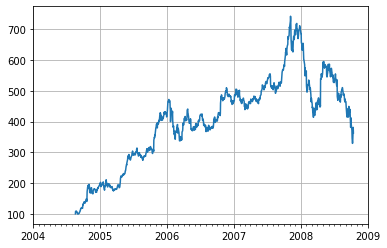

In [4]:
fig, ax = plt.subplots()
ax.plot('date', 'adj_close', data=data)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
datemin = np.datetime64(data['date'][0], 'Y')
datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate